# Predicting Car Market Prices using k-NN Algorithm

In this project, we'll use a car's attributes (e.g. fuel_type, engine_location, etc), to predict a car's market price using the k nearest neighbors algorithm. 

The dataset used in this project is found [here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data). The column names of the dataset will have to be manually inserted in, since the original dataset doesn't come with them. Names for the column can be found in the dataset's documentation [here](https://archive.ics.uci.edu/ml/datasets/automobile).

## Reading in and exploring the Dataset

In [2]:
import pandas as pd
import numpy as np

columns = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

cars = pd.read_csv('imports-85.data', names=columns)

pd.options.display.max_columns = 50

cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
print(cars.shape)
cars.info()

(205, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-rate     205 non-null float64
horsepower           2

At first glance, it seems like there aren't any values missing from the columns. 

When we preview the columns, however, it looks like there actually are some missing values, denoted by a "?".

We'll thus use the `df.replace()` method to replace the "?" values with numpy.nan missing values.

## Data Processing

In [4]:
cars = cars.replace("?", np.nan)

cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Conversion of `object` columns to `float`

Now, the next step should be to convert some nermical columns from "object" to numeric. Some of these are stored as "object" because of the "?" values.

In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    164 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         203 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null object
stroke               201 non-null object
compression-rate     205 non-null float64
horsepower           203 non-nul

The following columns will thus have to be changed to numeric:

In [6]:
cars[['normalized-losses', 'horsepower', 'peak-rpm', 'price']] = cars[['normalized-losses', 'horsepower', 'peak-rpm', 'price']].astype(float) 

cars.info()
# Also 'num-of-cylinders' needs to be changed.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    164 non-null float64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         203 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null object
stroke               201 non-null object
compression-rate     205 non-null float64
horsepower           203 non-nu

Our preview also showed us that the values in the `num-of-cylinders` column are in text form, but could be changed to numeric.

In [7]:
cars['num-of-cylinders'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64

In [8]:
cylinders_rename = {
    'four': 4,
    'six': 6,
    'five': 5,
    'eight': 8,
    'two': 2,
    'three': 3,
    'twelve': 12,
    4:4,
    6:6,
    5:5,
    8:8,
    2:2,
    3:3,
    12:12
}

cars['num-of-cylinders'] = (cars['num-of-cylinders'].map(cylinders_rename)).astype(float)

cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    164 non-null float64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         203 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null float64
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null object
stroke               201 non-null object
compression-rate     205 non-null float64
horsepower           203 non-n

The `num-of-doors` columns needs the same treatment.

In [9]:
cars['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [10]:
cars['num-of-doors'] = (cars['num-of-doors'].map(cylinders_rename)).astype(float)

In [11]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    164 non-null float64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         203 non-null float64
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null float64
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null object
stroke               201 non-null object
compression-rate     205 non-null float64
horsepower           203 non-

### Handling Missing Values

With the initial round of data processing finished, the next step should be to handle missing values that were replaced with `np.nan`.

Let's have a look at where the missing values are.

In [12]:
cars.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

The `price` column is the column we are trying to predict values for. As such, it would be best to simply drop rows that have a null value here.

In [13]:
cars = cars.dropna(subset=['price'])

cars.isnull().sum()

symboling             0
normalized-losses    37
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

We'll simply replace the rest of the missing values with the mean values of that column.

In [14]:
cars = cars.fillna(cars.mean())

cars.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

Some missing values remain, because these are `object` type fields. 

These should automatically be removed when we filter the dataframe to only include numeric columns:

In [15]:
numeric_cols = ['symboling', 'normalized-losses', 'num-of-doors',
               'wheel-base', 'length', 'width', 'height', 'curb-weight',
               'num-of-cylinders', 'engine-size', 'compression-rate',
               'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg',
               'price']

cars2 = cars[numeric_cols]

cars2.head()

cars2.isnull().sum()

symboling            0
normalized-losses    0
num-of-doors         0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
num-of-cylinders     0
engine-size          0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

### Normalizing columns

With the missing values handled, we'll now normalize the values in the numeric columns so that all values range only from 0 to 1, apart from the price column.

In [18]:
price_column = cars2['price']

normalized = (cars2 - cars2.min())/(cars2.max() - cars2.min())

normalized['price'] = price_column

normalized.head()

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1.0,0.298429,0.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.2,0.260377,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,1.0,0.298429,0.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.2,0.260377,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.6,0.298429,0.0,0.230321,0.449254,0.444444,0.383333,0.517843,0.4,0.343396,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.8,0.518325,1.0,0.384840,0.529851,0.504274,0.541667,0.329325,0.2,0.181132,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.8,0.518325,1.0,0.373178,0.529851,0.521368,0.541667,0.518231,0.3,0.283019,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


With the columns cleaned and normalized, we'll move on to the predictive modelling.

## Univariate k nearest neighbors models

We'll start with some simple univariate models, before moving on to more complex ones.

A function will be created, `knn_train_test`, that performs the training and validation process. 

The function will have 3 parameters:
1. Name of training column
2. Name of target column
3. Name of Dataframe object

The function will also perform the following actions:

- Splitting data set into a training and test sets.
- Instantiate KNeighborsRegressor class
- Fits the model on training set, then runs prediction on test set.
- Calculates the RMSE (root mean squared error), and returns it.

### Using Default k values

In [38]:
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

def knn_train_test(train_col, target_col, df):
    
    np.random.seed(3)
    
    # Shuffling the rows:
    shuffle = np.random.permutation(df.index)
    df = df.reindex(shuffle)
    
    # Splitting the dataset into train and test sets:
    train_df = df.iloc[:101]
    test_df = df.iloc[101:]
    
    # Instantiating KNeighborsRegressor Class
    knn = KNeighborsRegressor()
    
    # Training the model
    knn.fit(train_df[[train_col]], train_df[target_col])
    
    # Prediction of Outcome:
    predictions = knn.predict(test_df[[train_col]])
    
    # Calculating RMSE:
    rmse = (mean_squared_error(test_df[target_col], predictions))**0.5
    
    # Returning the RMSE
    return rmse    

The `knn_train_test` function above will be used to test the RMSE for each of the columns in the dataframe.

In [25]:
list_of_cols = normalized.columns.tolist()

list_of_cols.remove('price')

list_of_cols

['symboling',
 'normalized-losses',
 'num-of-doors',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'num-of-cylinders',
 'engine-size',
 'compression-rate',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg']

In [39]:
rmse_dict = {}

for each in list_of_cols:
    rmse = knn_train_test(each, 'price', normalized)
    rmse_dict[each] = rmse 
    
rmse_dict

{'city-mpg': 4568.5982186224255,
 'compression-rate': 6112.568148331764,
 'curb-weight': 4103.946917395497,
 'engine-size': 3561.0322905584558,
 'height': 6900.461916103877,
 'highway-mpg': 4333.9924881799225,
 'horsepower': 3786.927576439771,
 'length': 6093.611235548261,
 'normalized-losses': 10234.286648457723,
 'num-of-cylinders': 4649.82829932461,
 'num-of-doors': 8053.691126433891,
 'peak-rpm': 7579.500317514342,
 'symboling': 6494.786906435037,
 'wheel-base': 5816.277015755009,
 'width': 4135.782234305863}

We'll convert the dictionary above to a series object, so it can be sorted by values.

In [40]:
rmse_series = pd.Series(rmse_dict)

rmse_series.sort_values(ascending = True)

engine-size           3561.032291
horsepower            3786.927576
curb-weight           4103.946917
width                 4135.782234
highway-mpg           4333.992488
city-mpg              4568.598219
num-of-cylinders      4649.828299
wheel-base            5816.277016
length                6093.611236
compression-rate      6112.568148
symboling             6494.786906
height                6900.461916
peak-rpm              7579.500318
num-of-doors          8053.691126
normalized-losses    10234.286648
dtype: float64

**`engine-size` and `horsepower` seem to have the lowest RMSEs by a decent margin, using the default k values. **

This will be repeated with varying k values now.

### Varying the k value hyperparameter

The function from above `knn_train_test`, will be modified to use different values of k. We'll make a new function `knn_train_test2` that does this.

In [41]:
def knn_train_test2(train_col, target_col, df):
    
    np.random.seed(3)
    
    # Shuffling the rows:
    shuffle = np.random.permutation(df.index)
    df = df.reindex(shuffle)
    
    # Splitting the dataset into train and test sets:
    train_df = df.iloc[:101]
    test_df = df.iloc[101:]
    
    k_values = [1,3,5,7,9]
    
    rmse_list = []
    for k in k_values:
    # Instantiating KNeighborsRegressor Class
        knn = KNeighborsRegressor(n_neighbors = k)

        # Training the model
        knn.fit(train_df[[train_col]], train_df[target_col])

        # Prediction of Outcome:
        predictions = knn.predict(test_df[[train_col]])

        # Calculating RMSE:
        rmse = (mean_squared_error(test_df[target_col], predictions))**0.5
        
        rmse_list.append(rmse)
    
    # Returning the RMSE
    return rmse_list  

knn_train_test2('symboling', 'price', normalized)

[10177.172654524438,
 6579.557765365221,
 6494.786906435037,
 6251.039553889073,
 6237.645195242224]

In [42]:
rmse_dict_vary_k = {}

for each in list_of_cols:
    rmse = knn_train_test2(each, 'price', normalized)
    rmse_dict_vary_k[each] = rmse 
    
rmse_dict_vary_k

{'city-mpg': [6573.623512188692,
  4771.909923826215,
  4568.5982186224255,
  4778.367151132321,
  4484.1980113849395],
 'compression-rate': [5895.963557383984,
  5694.085867908132,
  6112.568148331764,
  6537.777030349951,
  7006.3204998534475],
 'curb-weight': [5304.431039235028,
  4780.488526755864,
  4103.946917395497,
  4037.0515429719558,
  3913.4057758611243],
 'engine-size': [3921.2347761897654,
  3173.1739366480083,
  3561.0322905584558,
  3713.8102414899877,
  3541.0211438384704],
 'height': [9007.46324277818,
  7147.257240757152,
  6900.461916103877,
  6913.333813371233,
  6865.546513498568],
 'highway-mpg': [5134.019955161842,
  4372.760143839992,
  4333.9924881799225,
  4255.5769768526525,
  4027.1372139523633],
 'horsepower': [3967.6930803679866,
  3769.2446338755994,
  3786.927576439771,
  4031.826680960644,
  4170.5568138476265],
 'length': [7896.549936522912,
  6067.213833932892,
  6093.611235548261,
  6049.687357295451,
  6059.40057085061],
 'normalized-losses': [1309

The dictionary above can be turned into a dataframe.

In [53]:
vary_k_df_rmse = pd.DataFrame(rmse_dict_vary_k)

vary_k_df_rmse['k_value'] = pd.Series([1,3,5,7,9])

We'll move the `k_value` column to the front.

In [54]:
cols = vary_k_df_rmse.columns.tolist()

cols = [ 'k_value',
 'city-mpg',
 'compression-rate',
 'curb-weight',
 'engine-size',
 'height',
 'highway-mpg',
 'horsepower',
 'length',
 'normalized-losses',
 'num-of-cylinders',
 'num-of-doors',
 'peak-rpm',
 'symboling',
 'wheel-base',
 'width']

vary_k_df_rmse = vary_k_df_rmse[cols]

vary_k_df_rmse

,k_value,city-mpg,compression-rate,curb-weight,engine-size,height,highway-mpg,horsepower,length,normalized-losses,num-of-cylinders,num-of-doors,peak-rpm,symboling,wheel-base,width
0,1,6573.623512,5895.963557,5304.431039,3921.234776,9007.463243,5134.019955,3967.693080,7896.549937,13095.935194,6983.287547,9060.976954,8808.200045,10177.172655,5815.243986,2945.191800
1,3,4771.909924,5694.085868,4780.488527,3173.173937,7147.257241,4372.760144,3769.244634,6067.213834,12315.835299,4914.765086,8779.831351,6907.297460,6579.557765,6288.834662,3532.479056
2,5,4568.598219,6112.568148,4103.946917,3561.032291,6900.461916,4333.992488,3786.927576,6093.611236,10234.286648,4649.828299,8053.691126,7579.500318,6494.786906,5816.277016,4135.782234
3,7,4778.367151,6537.777030,4037.051543,3713.810241,6913.333813,4255.576977,4031.826681,6049.687357,9631.081510,4971.803086,7554.738132,7174.250249,6251.039554,5787.007172,4122.639176
4,9,4484.198011,7006.320500,3913.405776,3541.021144,6865.546513,4027.137214,4170.556814,6059.400571,8225.357987,5051.092073,7684.461231,7211.977249,6237.645195,5768.790776,4246.303226


In [65]:
vary_k_df_rmse.mean().sort_values(ascending=True)

k_value                  5.000000
engine-size           3582.054478
width                 3796.479099
horsepower            3945.249757
highway-mpg           4424.697356
curb-weight           4427.864760
city-mpg              5035.339363
num-of-cylinders      5314.155218
wheel-base            5895.230722
compression-rate      6249.343021
length                6433.292587
symboling             7148.040415
height                7366.812545
peak-rpm              7536.245064
num-of-doors          8226.739759
normalized-losses    10700.499328
dtype: float64

** On average, the `engine-size`, `width`, and `horsepower` columns prove to have the lowest RMSE values**. These are consistent with the results from only using the default k values.

### Visualizing k-values against RMSE for each predictor variable

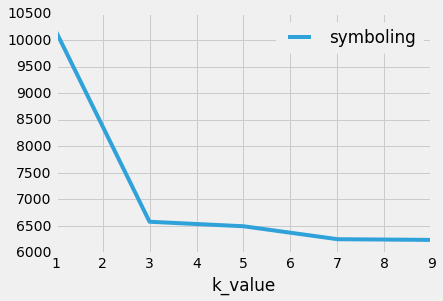

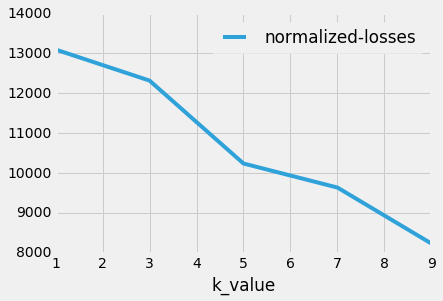

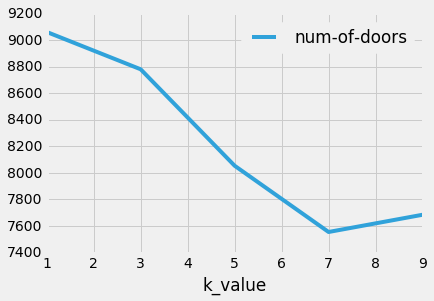

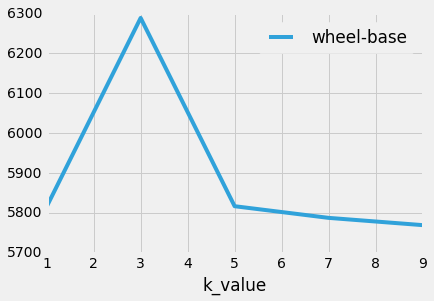

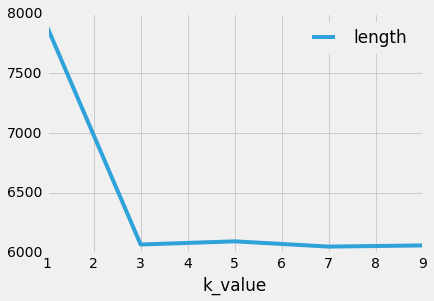

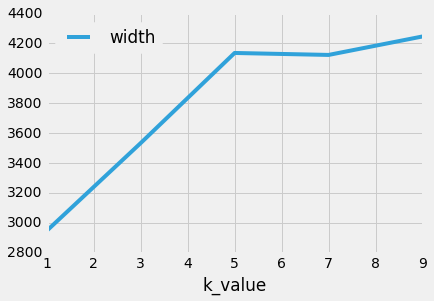

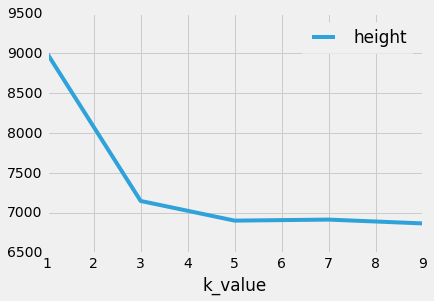

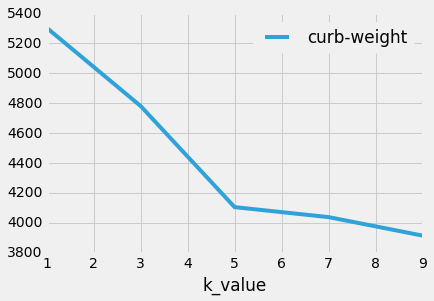

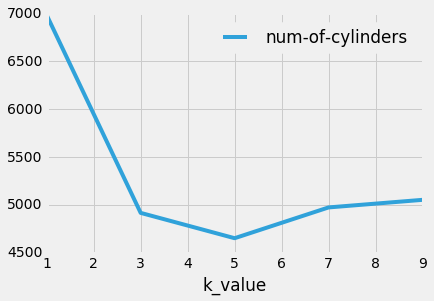

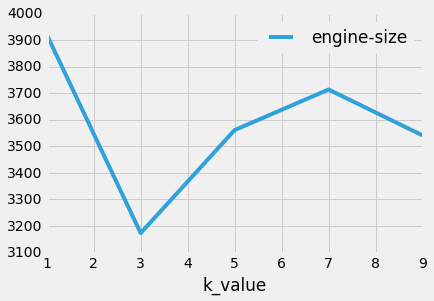

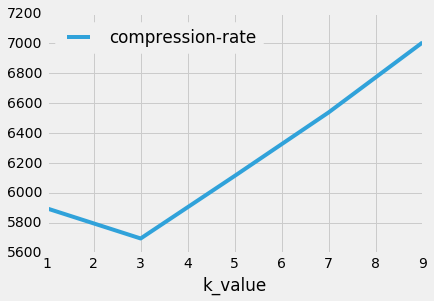

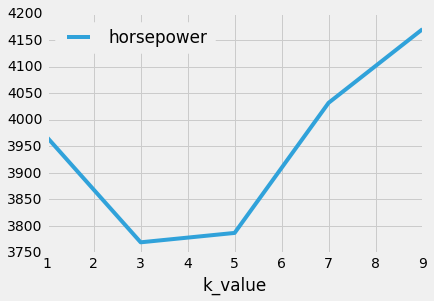

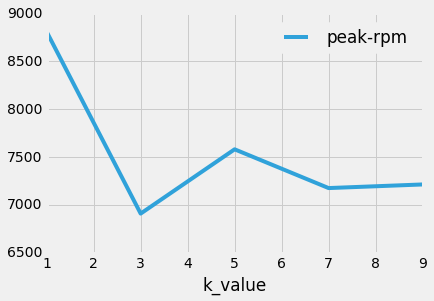

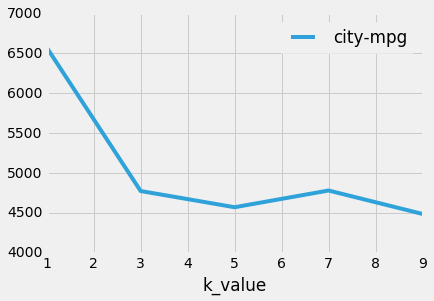

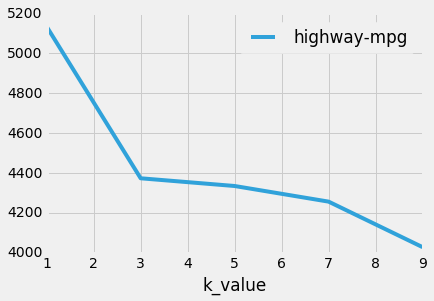

In [56]:
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
style.use('fivethirtyeight')

for each in list_of_cols:
    vary_k_df_rmse.plot('k_value', each)

Let's instead visualize the above graphs in the same plot:

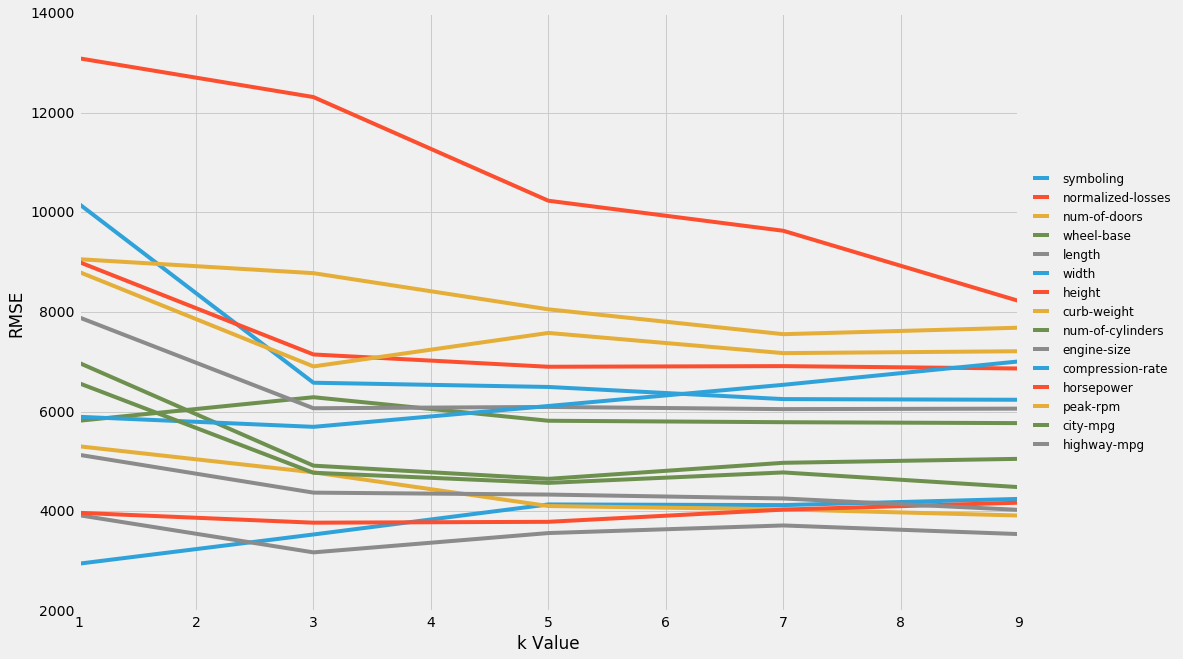

In [100]:
plt.figure(figsize=(15,10))
for each in list_of_cols:
    x = vary_k_df_rmse['k_value']
    y = vary_k_df_rmse[each]
    
    plt.plot(x,y)
    
    plt.xlabel('k Value')
    plt.ylabel('RMSE')
    plt.legend(prop={'size': 12},loc='center left', bbox_to_anchor=(1, 0.5))

## Multivariate Training Models

Instead of using a single training column, we'll now make a new function, `knn_train_test3`, that accepts multiple training columns in a list, but uses the default k value. This will therefore mostly be a modification of `knn_train_test`.

In [66]:
def knn_train_test3(train_cols, target_col, df):
    
    np.random.seed(3)
    
    # Shuffling the rows:
    shuffle = np.random.permutation(df.index)
    df = df.reindex(shuffle)
    
    # Splitting the dataset into train and test sets:
    train_df = df.iloc[:101]
    test_df = df.iloc[101:]
    
    # Instantiating KNeighborsRegressor Class
    knn = KNeighborsRegressor()
    
    # Training the model
    knn.fit(train_df[train_cols], train_df[target_col])
    
    # Prediction of Outcome:
    predictions = knn.predict(test_df[train_cols])
    
    # Calculating RMSE:
    rmse = (mean_squared_error(test_df[target_col], predictions))**0.5
    
    # Returning the RMSE
    return rmse    

This function will be called 5 times, using:

- 2 best features from the previous step
- 3 best features from the previous step
- 4 best features from the previous step
- 5 best features from the previous step

### Using default k-values

In [67]:
vary_k_df_rmse.mean().sort_values(ascending=True)

k_value                  5.000000
engine-size           3582.054478
width                 3796.479099
horsepower            3945.249757
highway-mpg           4424.697356
curb-weight           4427.864760
city-mpg              5035.339363
num-of-cylinders      5314.155218
wheel-base            5895.230722
compression-rate      6249.343021
length                6433.292587
symboling             7148.040415
height                7366.812545
peak-rpm              7536.245064
num-of-doors          8226.739759
normalized-losses    10700.499328
dtype: float64

In [70]:
best_features = vary_k_df_rmse.mean().sort_values(ascending=True).index.tolist()[1:6]

best_features

['engine-size', 'width', 'horsepower', 'highway-mpg', 'curb-weight']

Above, we created a list of the 5 best features from univariate modelling, in ascending order of rmse (so the best feature, i.e. the one with the lowest average rmse, is first)

In [88]:
rmse_dict_multivariate = {}

for i in range(2,6):
    feature_columns = best_features[0:i]
    rmse = knn_train_test3(feature_columns, 'price', normalized)
    rmse_dict_multivariate[str(i) + " best features"] = rmse
    
rmse_dict_multivariate

{'2 best features': 3288.3387396069766,
 '3 best features': 2934.7463862487334,
 '4 best features': 2662.7699979532595,
 '5 best features': 2979.0503014887145}

In [90]:
rmse_series_multivariate = pd.Series(rmse_dict_multivariate)

rmse_series_multivariate.sort_values()

4 best features    2662.769998
3 best features    2934.746386
5 best features    2979.050301
2 best features    3288.338740
dtype: float64

We see above that the lowest RMSE is observed when using the 4 best features to predict a model's price. 

Namely, `['engine-size', 'width', 'horsepower', 'highway-mpg']`.

Unsurprisingly, we also see that the multivariate training model returns much lower rmse values than the univariate training model. 

### Varying the k-value hyperparameter

We'll now use the top 3 model models from the previous step, i.e. the models using the 4 best, 3 best, and 5 best features, and examine the RMSEs of these models when the k-value hyperparameter is altered between 1 and 25. 

This will mean we'll create a new function, `knn_train_test4`, that varies the k values.

In [104]:
def knn_train_test4(train_cols, target_col, df):
    
    np.random.seed(3)
    
    # Shuffling the rows:
    shuffle = np.random.permutation(df.index)
    df = df.reindex(shuffle)
    
    # Splitting the dataset into train and test sets:
    train_df = df.iloc[:101]
    test_df = df.iloc[101:]
    
    k_values = [each for each in range(1,26)]
    
    rmse_list = []
    
    for k in k_values:
        
        # Instantiating KNeighborsRegressor Class
        knn = KNeighborsRegressor(n_neighbors=k)

        # Training the model
        knn.fit(train_df[train_cols], train_df[target_col])

        # Prediction of Outcome:
        predictions = knn.predict(test_df[train_cols])

        # Calculating RMSE:
        rmse = (mean_squared_error(test_df[target_col], predictions))**0.5
        
        rmse_list.append(rmse)

    # Returning the RMSE
    return rmse_list 

In [115]:
rmse_dict_multivariate2 = {}

best_features = vary_k_df_rmse.mean().sort_values(ascending=True).index.tolist()[1:6]

for i in range(3,6):
    feature_columns = best_features[0:i]
    rmse = knn_train_test4(feature_columns, 'price', normalized)
    rmse_dict_multivariate2[str(i) + " best features"] = rmse
    
rmse_dict_multivariate2

{'3 best features': [2800.583032155983,
  2648.6974959402214,
  2735.86825990499,
  2843.2177117220554,
  2934.7463862487334,
  2970.24775565945,
  3037.941795804172,
  3171.3544701456035,
  3243.4047174588877,
  3290.7665543304647,
  3405.118246742324,
  3510.290168660483,
  3622.278806801208,
  3627.0696145969755,
  3613.309977808897,
  3604.2456013815327,
  3682.09382266766,
  3711.9064403336088,
  3793.92987738874,
  3834.094339475752,
  3889.5734857841667,
  3944.8307824767385,
  3929.503417449904,
  3998.643831624355,
  4018.407358438415],
 '4 best features': [2401.054793210684,
  2454.884749840611,
  2486.756053576627,
  2871.584966856283,
  2662.7699979532595,
  2774.861480076278,
  2922.0311922303886,
  3008.016209387426,
  3091.1014005359098,
  3243.4243074873816,
  3377.0512554936745,
  3429.729827936727,
  3521.5713813950097,
  3564.7004558588096,
  3602.5810007024443,
  3642.004379469927,
  3690.7286483724256,
  3728.1191696797105,
  3787.0575470700132,
  3866.524211627285

We'll convert the above to a data-frame, and add a column to include the k_value:

In [121]:
rmse_multivariate_k_df = pd.DataFrame(rmse_dict_multivariate2)

rmse_multivariate_k_df['k_value']= pd.Series([x for x in range(1,26)])

rmse_multivariate_k_df

,3 best features,4 best features,5 best features,k_value
0,2800.583032,2401.054793,2201.958235,1
1,2648.697496,2454.884750,2287.899887,2
2,2735.868260,2486.756054,2473.974508,3
3,2843.217712,2871.584967,2908.615275,4
4,2934.746386,2662.769998,2979.050301,5
5,2970.247756,2774.861480,3059.168224,6
6,3037.941796,2922.031192,3148.964899,7
7,3171.354470,3008.016209,3318.613560,8
8,3243.404717,3091.101401,3387.947532,9
9,3290.766554,3243.424307,3443.086020,10


### Visualizing outcome of Multivariate modelling by varying k-value hyperparameter

We'll visualize the results we achieved above:

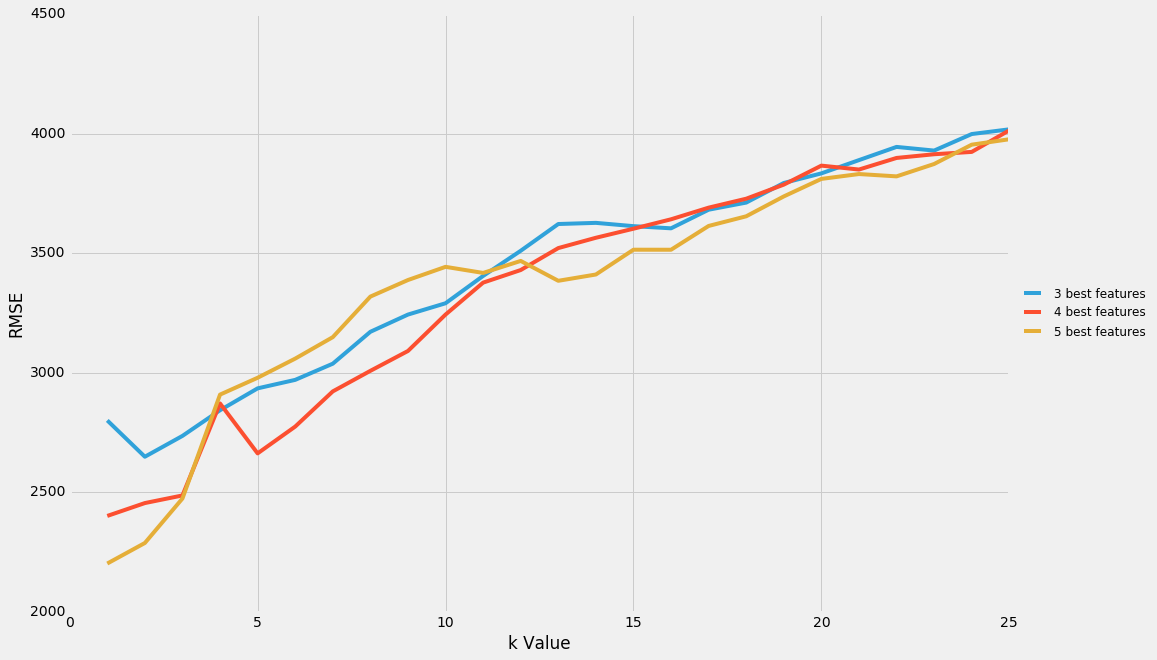

In [122]:
plt.figure(figsize=(15,10))
for each in ["3 best features", "4 best features", "5 best features"]:
    x = rmse_multivariate_k_df['k_value']
    y = rmse_multivariate_k_df[each]
    
    plt.plot(x,y)
    
    plt.xlabel('k Value')
    plt.ylabel('RMSE')
    plt.legend(prop={'size': 12},loc='center left', bbox_to_anchor=(1, 0.5))

We see from above that the optimal k-value for "3 best features" is 2, for "4 best features" it's 1, and for "5 best features" it is also 1. 

Once we go past a k-value of 7, all the RMSE values exceed 3000, and from that point on only increase.

From the graph, we determine that:

1. **predictive modelling should be performed using the 4 or 5 best features** (the 5 best being, in order of best to worst, `['engine-size', 'width', 'horsepower', 'highway-mpg', 'curb-weight']`. 
2. **A k-value of 3 or less** should be used to minimize the root mean squared error value.